In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# load Dataset From CSV File
data = pd.read_csv("d:/AIML And DSA/AI & ML Projects/Machine Learning Algorithm/Dataset/homeprices.csv")

In [3]:
# Extract the 'area' and 'price' columns
X = data['area'].values
y = data['price'].values

In [4]:
# Normalize the data
X_mean = np.mean(X)
X_std = np.std(X)
y_mean = np.mean(y)
y_std = np.std(y)

X_normalized = (X - X_mean) / X_std
y_normalized = (y - y_mean) / y_std

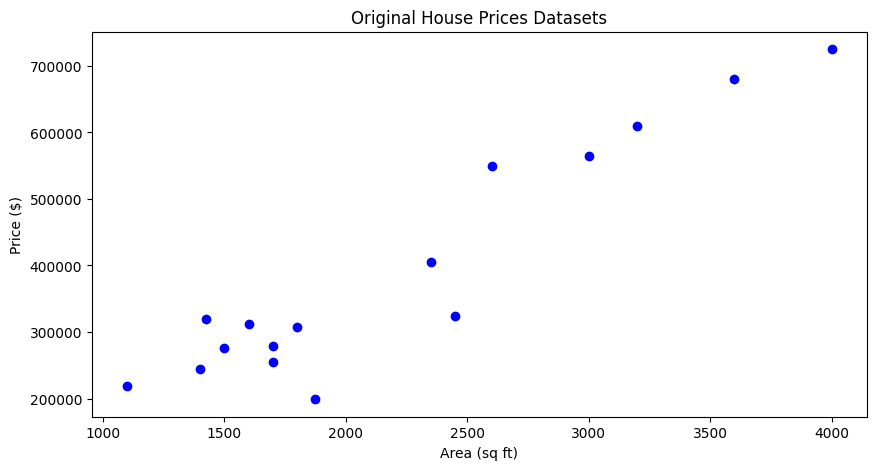

In [5]:
# Plot original dataset
plt.figure(figsize = (10,5))
plt.scatter(X,y, color = 'blue')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Original House Prices Datasets')
plt.show()

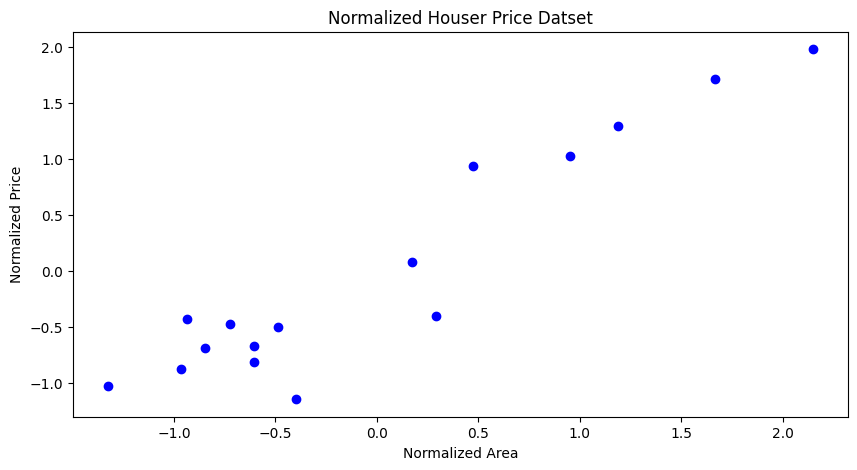

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X_normalized, y_normalized, color = 'blue')
plt.xlabel('Normalized Area')
plt.ylabel('Normalized Price')
plt.title('Normalized Houser Price Datset')
plt.show()

In [7]:
class LinearRegression:

  def __init__(self,learning_rate=0.01, iterations=1000):
    
    # Initilize Learningrate and number of iteration
    self.learning_rate = learning_rate
    self.iterations = iterations

    # initialize the parameter
    self.theta0 = 0
    self.theta1 = 0

    #list to store the cost and parameters for visulization
    self.cost_history = []
    self.theta0_history = []
    self.theta1_history = []

  def predict(self,X):
    """
    Predict the value of y using the hypothesis function.
    y_hat = theta0 + theta1 * X
    """

    return self.theta0 + self.theta1 * X
  
  def compute_cost(self,X,y):
    """
    Compute the cost function (Mean Squared Error).
    J(theta0, theta1) = (1/(2*m)) * sum((y_hat - y)^2)
    """

    m = len(y)
    y_hat = self.predict(X)
    cost = (1/(2 * m)) * np.sum((y_hat - y) ** 2)
    return cost
  
  def fit(self,X,y):
    """
    Fit the linear regression model to the dataset using gradient descent.
    """

    m = len(y)

    for i in range(self.iterations):
      y_hat = self.predict(X)

      # Compute the gradient
      d_theta0 = (1/m) * np.sum(y_hat - y)
      d_theta1 = (1/m) * np.sum(y_hat - y) * X

      # update the parameters
      self.theta0 -= self.learning_rate * d_theta0
      self.theta1 -= self.learning_rate * d_theta1

      # store cost and parameters for visulization
      cost = self.compute_cost(X,y)
      self.cost_history.append(cost)
      self.theta0_history.append(self.theta0)
      self.theta1_history.append(self.theta1)

      # Print the cost for every 100 iterations to monitor the training process
      if i % 100 == 0:
        print(f"iteration {i}, cost: {cost}, theta0: {self.theta0}, theta1: {self.theta1}")


In [8]:
# Create an instance of the LinearRegression class with a suitable learning rate
model = LinearRegression(learning_rate=0.001, iterations = 1000)

# initial hypothesis before training
initial_predictions = model.predict(X_normalized)
 

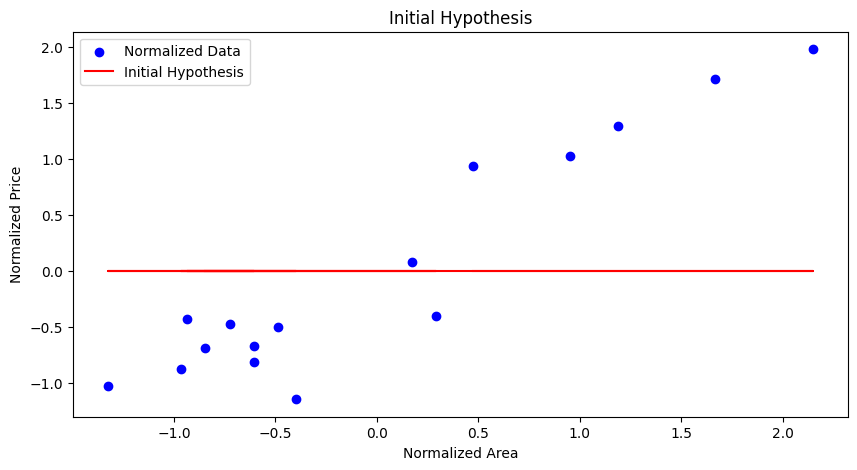

In [9]:
# Plot the initial hypothesis
plt.figure(figsize=(10, 5))
plt.scatter(X_normalized, y_normalized, color='blue', label='Normalized Data')
plt.plot(X_normalized, initial_predictions, color='red', label='Initial Hypothesis')
plt.xlabel('Normalized Area')
plt.ylabel('Normalized Price')
plt.title('Initial Hypothesis')
plt.legend()
plt.show()

In [10]:
# fit the model to the dataset
model.fit(X_normalized, y_normalized)

iteration 0, cost: 0.5, theta0: 2.7755575615628914e-20, theta1: [ 1.30912523e-20  2.63903022e-20  3.30398271e-20  4.63388770e-20
  5.96379269e-20 -2.68058975e-20 -2.01563725e-20 -1.68316100e-20
 -1.35068476e-20 -1.10132757e-20 -3.67801849e-20  4.77934606e-21
  8.10410854e-21 -2.59747069e-20 -1.68316100e-20 -2.34811350e-20]
iteration 100, cost: 0.5, theta0: 2.8033131371785224e-18, theta1: [ 1.32221648e-18  2.66542052e-18  3.33702254e-18  4.68022658e-18
  6.02343062e-18 -2.70739564e-18 -2.03579362e-18 -1.69999261e-18
 -1.36419160e-18 -1.11234085e-18 -3.71479868e-18  4.82713952e-19
  8.18514962e-19 -2.62344539e-18 -1.69999261e-18 -2.37159463e-18]
iteration 200, cost: 0.5, theta0: 5.578870698741416e-18, theta1: [ 2.63134170e-18  5.30445073e-18  6.64100525e-18  9.31411428e-18
  1.19872233e-17 -5.38798539e-18 -4.05143088e-18 -3.38315362e-18
 -2.71487636e-18 -2.21366842e-18 -7.39281717e-18  9.60648558e-19
  1.62892582e-18 -5.22091608e-18 -3.38315362e-18 -4.71970813e-18]
iteration 300, cost: 0

In [11]:
# Predict values using the trained model
predictions_normalized = model.predict(X_normalized)
predictions = predictions_normalized * y_std + y_mean

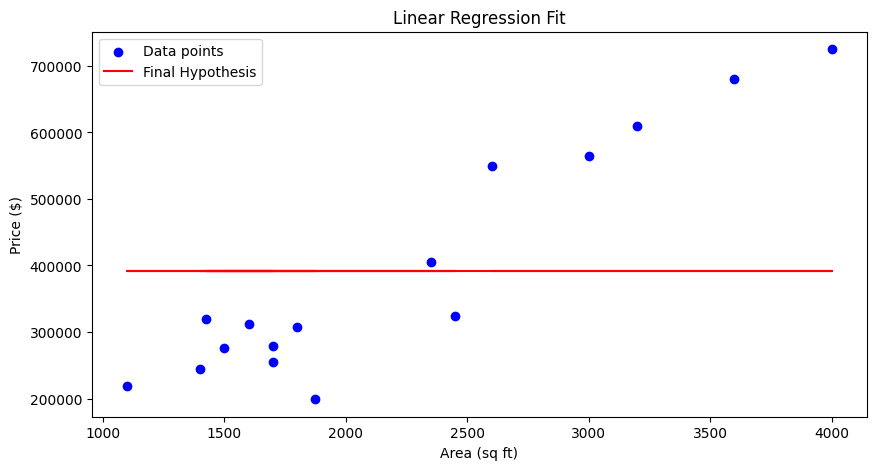

Final parameters: theta0 = 1.817990202823695e-17, theta1 = [ 8.57477023e-18  1.72856479e-17  2.16410868e-17  3.03519645e-17
  3.90628421e-17 -1.75578628e-17 -1.32024240e-17 -1.10247046e-17
 -8.84698515e-18 -7.21369559e-18 -2.40910211e-17  3.13047167e-18
  5.30819109e-18 -1.70134330e-17 -1.10247046e-17 -1.53801434e-17]


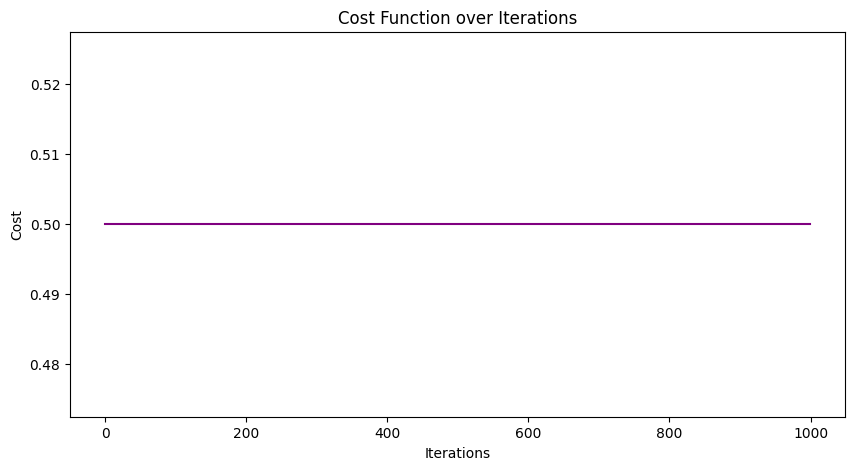

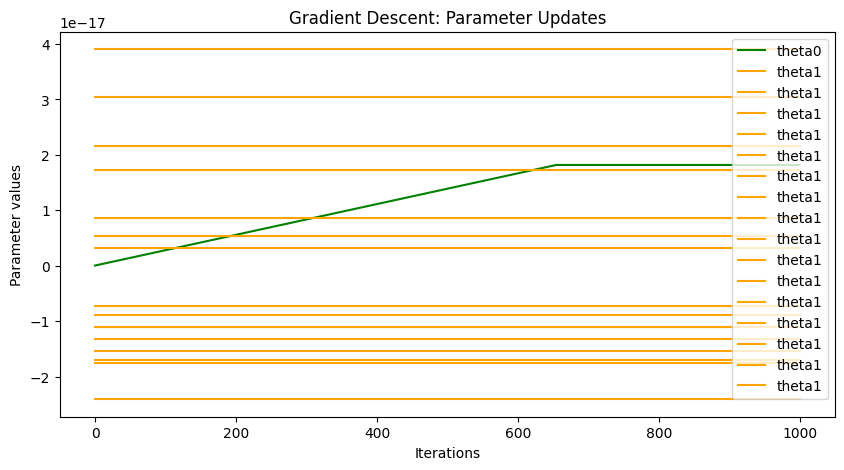

In [21]:
# Plot the final hypothesis after training
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', label='Final Hypothesis')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)') 
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Print the final parameters
print(f"Final parameters: theta0 = {model.theta0}, theta1 = {model.theta1}")

# Plot the cost function (loss) over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(model.iterations), model.cost_history, color='purple')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

# Plot the gradient descent process (theta0 and theta1 updates)
plt.figure(figsize=(10, 5))
plt.plot(range(model.iterations), model.theta0_history, label='theta0', color='green')
plt.plot(range(model.iterations), model.theta1_history, label='theta1', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Parameter values')
plt.title('Gradient Descent: Parameter Updates')
plt.legend()
plt.show()

In [17]:
# Plot the gradient descent curve on the cost surface
theta0_vals = np.linspace(-1, 3, 100)
theta1_vals = np.linspace(-1, 3, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

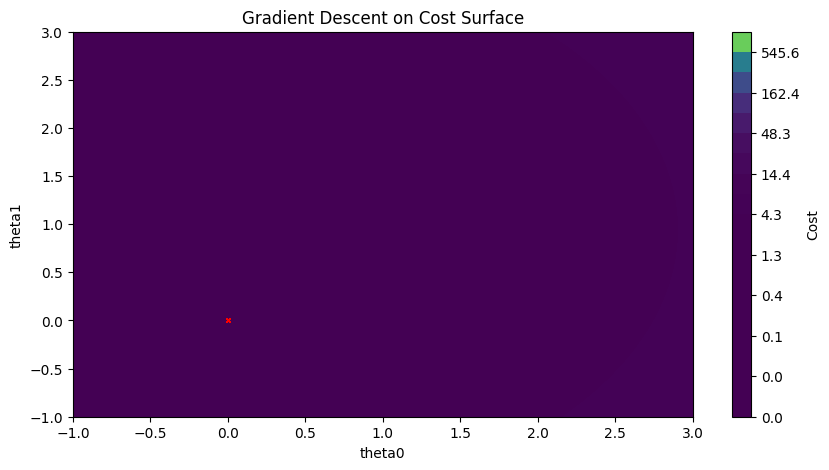

In [18]:
# Fill J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t0 = theta0_vals[i]
        t1 = theta1_vals[j]
        J_vals[i, j] = (1 / (2 * len(X_normalized))) * np.sum((t0 + t1 * X_normalized - y_normalized) ** 2)

J_vals = J_vals.T
theta0_history = np.array(model.theta0_history)
theta1_history = np.array(model.theta1_history)

plt.figure(figsize=(10, 5))
plt.contourf(theta0_vals, theta1_vals, J_vals, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.plot(theta0_history, theta1_history, 'rx-', markersize=3, linewidth=1)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Gradient Descent on Cost Surface')
plt.colorbar(label='Cost')
plt.show()